In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#load the dataset

spam_df = pd.read_csv("c:\\Users\\johnb\\OneDrive\\Desktop\\project 1\\P74-Project-6\\Project 6\\emails.csv")

spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [3]:
#visualisation of the dataset
ham = spam_df[spam_df ['spam'] == 0]


spam = spam_df[spam_df['spam'] == 1]






In [4]:
#spam mail percentage
print('spam percentage', (len(spam)/len(spam_df)*100, '%'))


spam percentage (23.88268156424581, '%')


In [5]:
#percentage of Ham mail
print('Ham percentage', (len(ham)/len(spam_df)*100, '%'))


Ham percentage (76.11731843575419, '%')


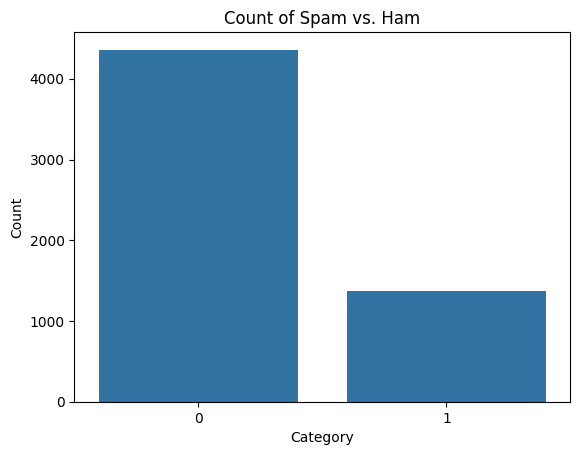

In [6]:
#visualisation of the dataset.
sns.countplot(x='spam', data=spam_df).set(title='Count of Spam vs. Ham', xlabel='Category', ylabel='Count')
plt.show()


In [7]:
# count vectorization

Vectorizer = CountVectorizer()
spamham_countvectorizer = Vectorizer.fit_transform(spam_df['text'])

In [8]:
print(Vectorizer.get_feature_names_out())
print(spamham_countvectorizer.toarray())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
spamham_countvectorizer.shape

(5728, 37303)

In [10]:
label = spam_df['spam'].values

label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [11]:
#Training the model
X = spamham_countvectorizer
y = label

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
NB_classifier = MultinomialNB()

NB_classifier.fit(X_train, y_train)



MultinomialNB()

In [14]:
#MODEL EVALUATION

y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

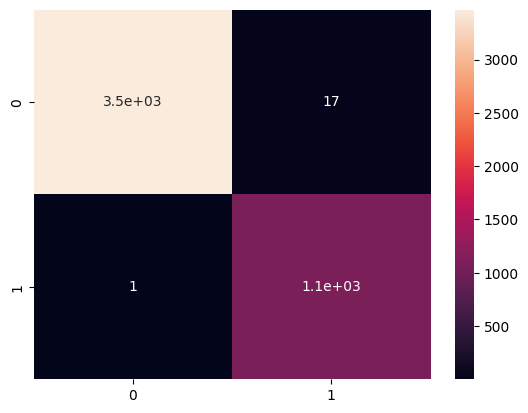

In [15]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

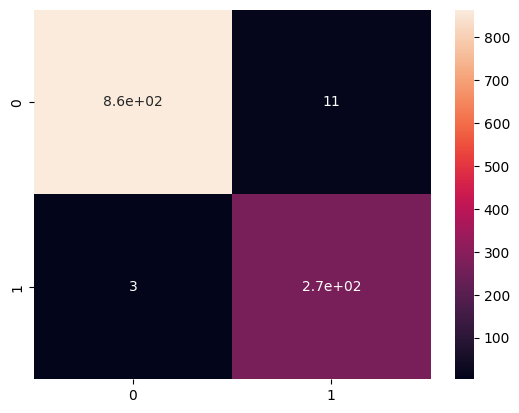

In [16]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [17]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       875
           1       0.96      0.99      0.97       271

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

